# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, EstType, PlotType)
from lib import (stack, fpoints, fcurve, curve, perform_est)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, xmax=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_MEAN, φ=φ, μ=μ)
    fcurve(ar, data_type=DataType.CUMU_MEAN, func_type=DataType.AR1_OFFSET_MEAN, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, xmax=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_SD, φ=φ, σ=σ)
    fcurve(ar, data_type=DataType.CUMU_SD, func_type=DataType.AR1_OFFSET_SD, title_offset=1.025, plot_type=PlotType.XLOG)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Simulation $\varphi$ Scan

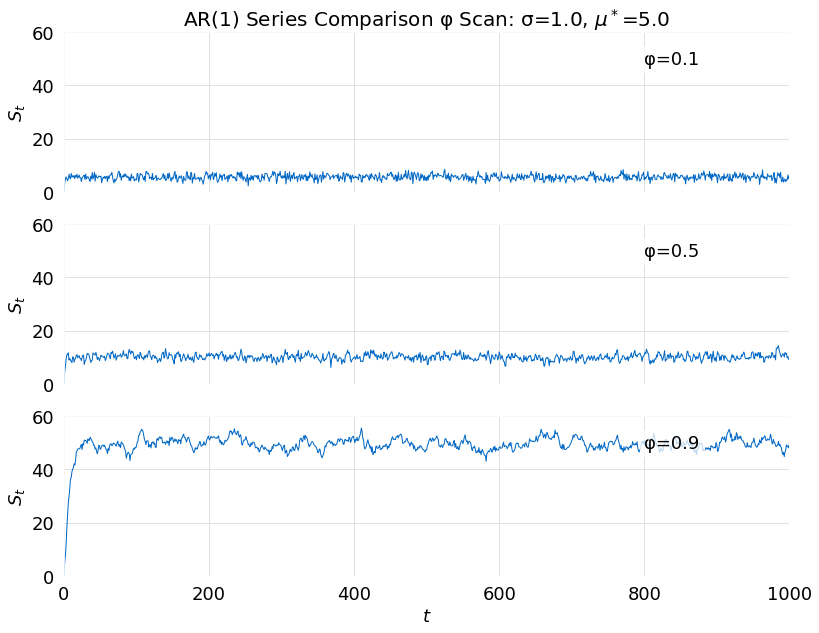

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

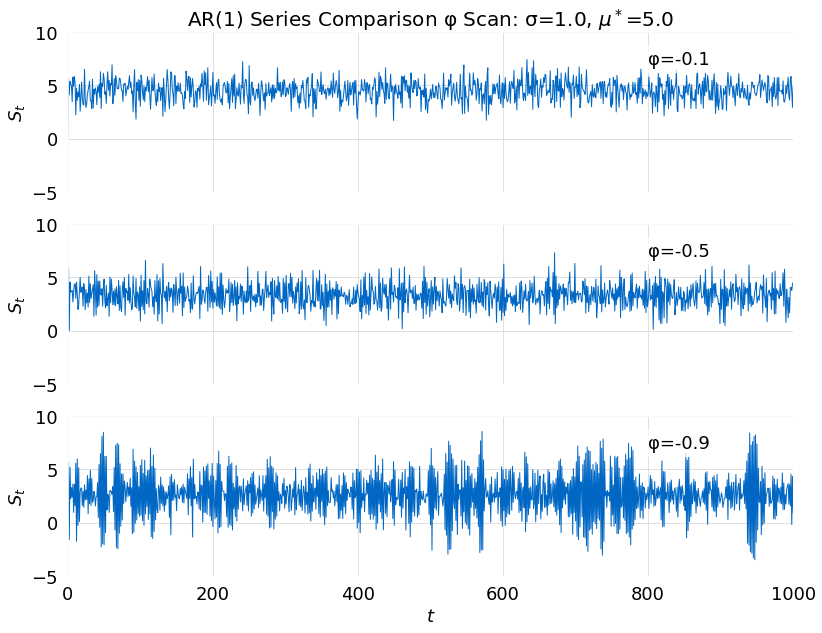

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

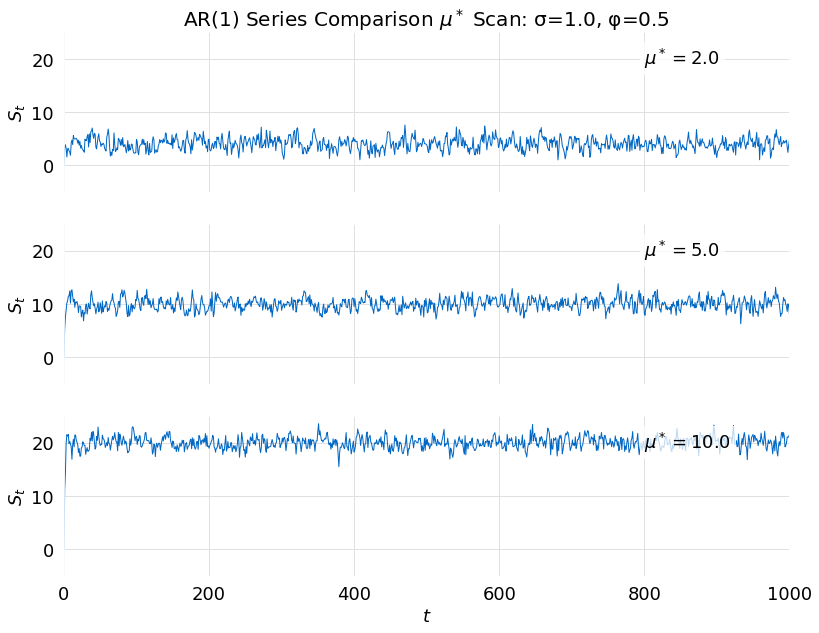

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

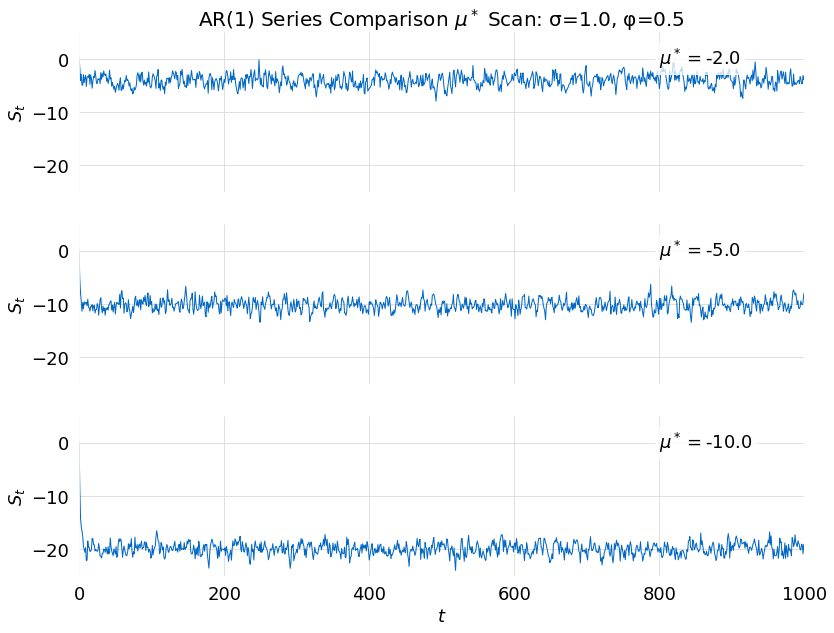

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

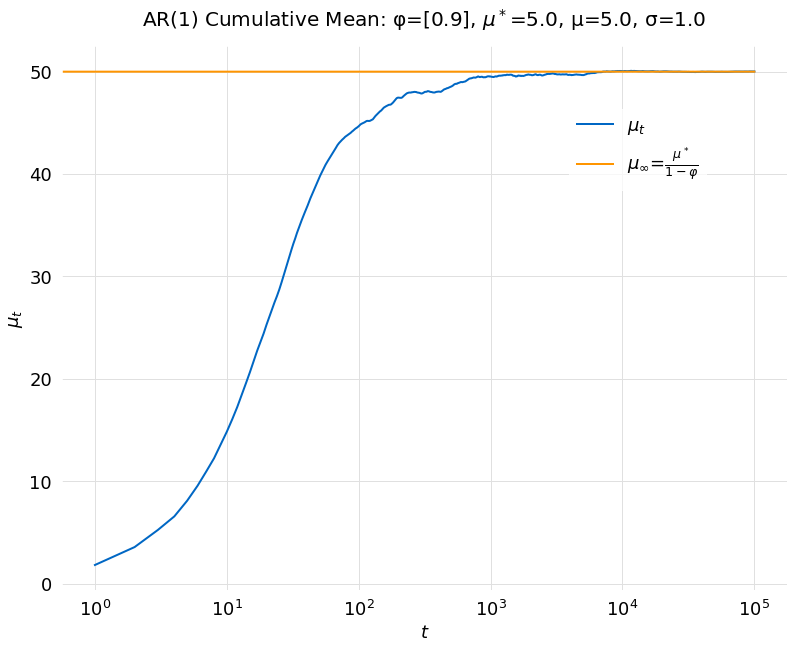

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

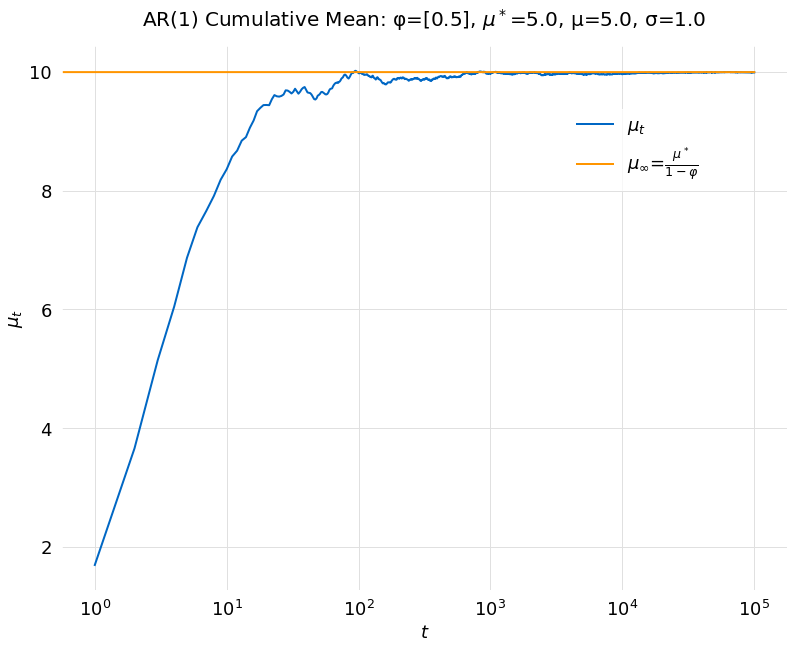

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

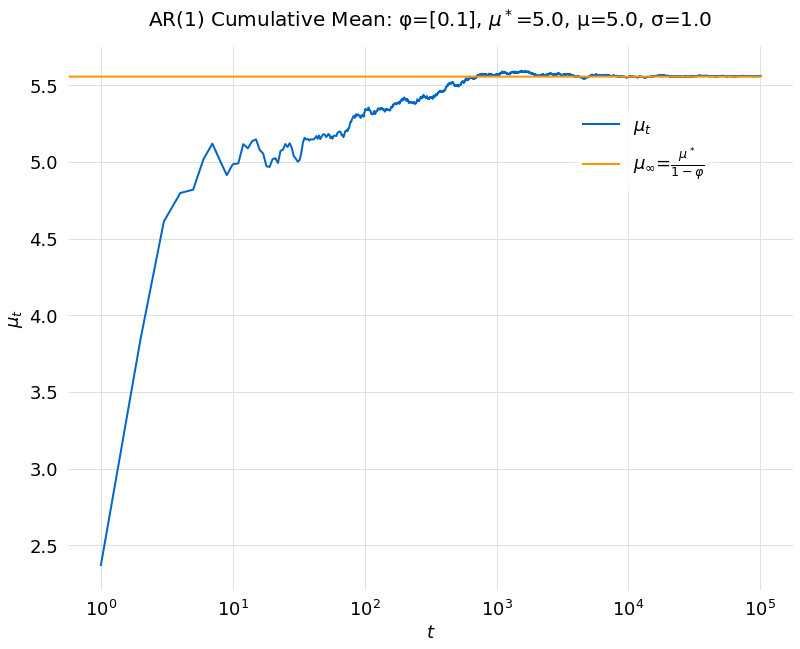

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

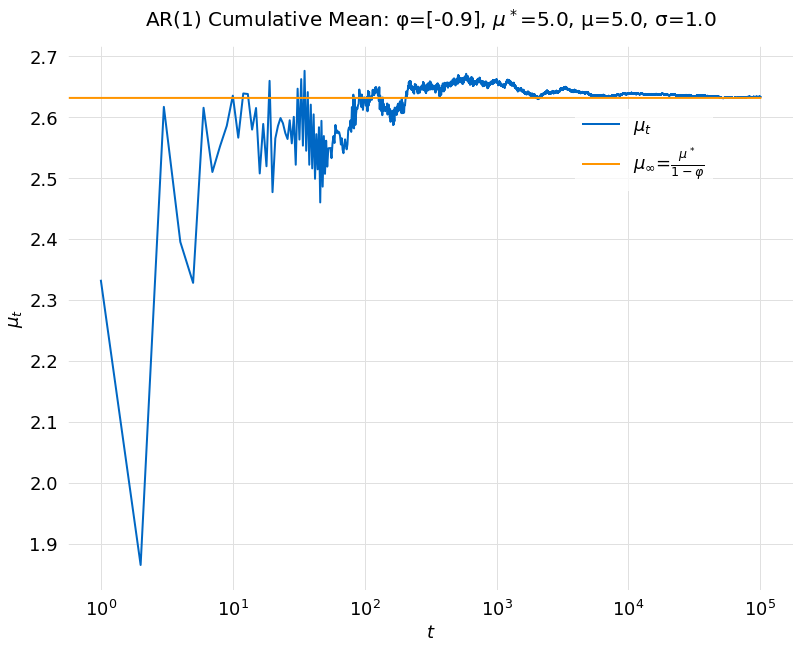

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

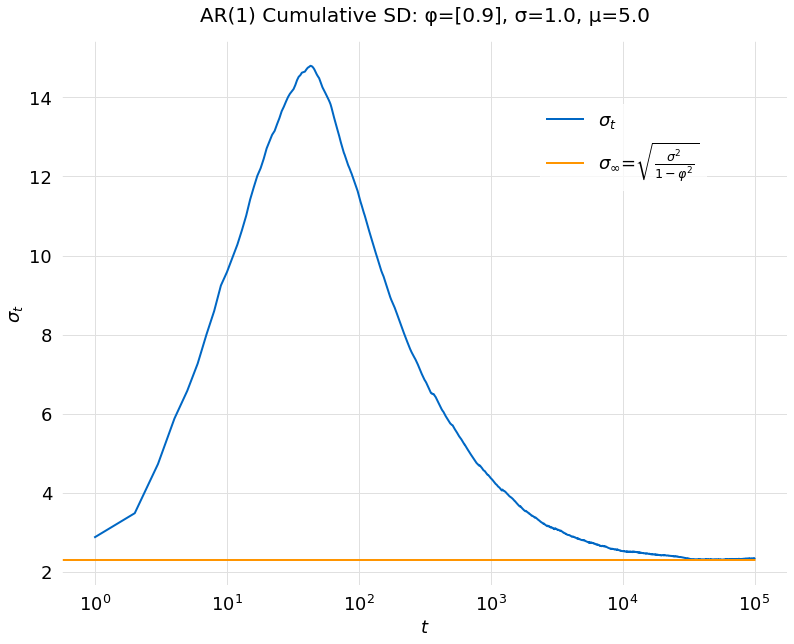

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

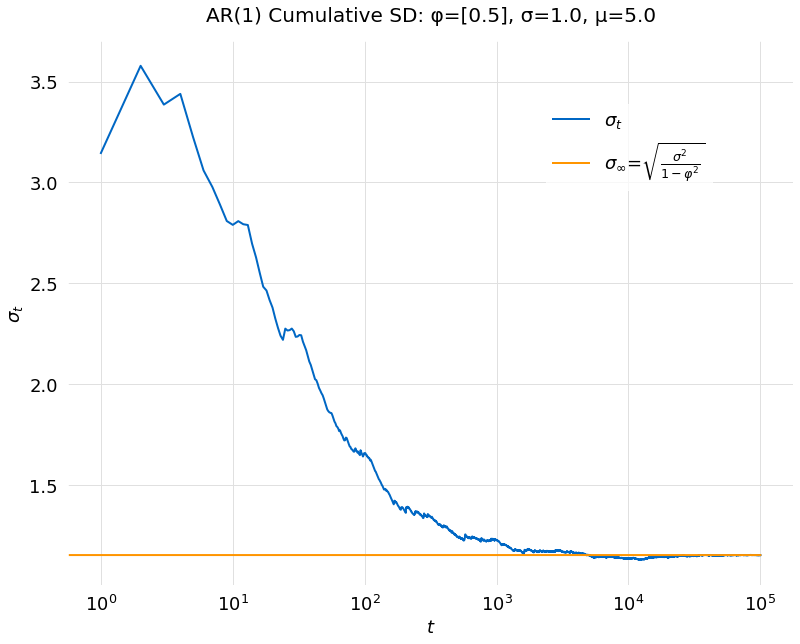

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

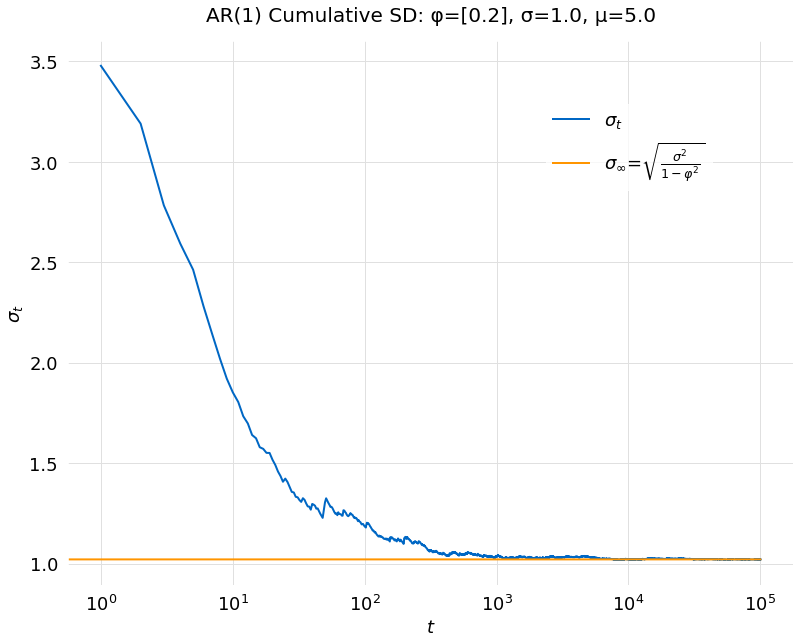

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

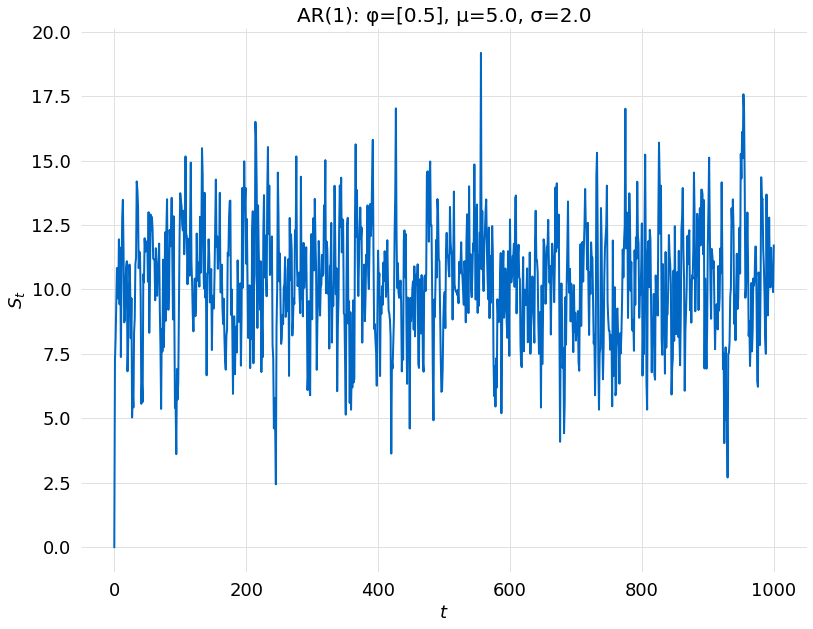

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [15]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2109.214
Date:                Tue, 17 May 2022   AIC                           4224.427
Time:                        19:56:39   BIC                           4239.154
Sample:                             0   HQIC                          4230.024
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2148      0.131     77.896      0.000       9.958      10.472
ar.L1          0.5273      0.025     21.235      0.000       0.479       0.576
sigma2         3.9591      0.166     23.863      0.000       3.634       4.284
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                 6.81
Prob(Q):                              0.21   Prob(JB):                         0.03
Heteroskedasticity (H):               1.03   Skew:                            -0.09
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [10.21484548362305, 0.13113408753955638],
    'Parameters': [[0.5272901115000038, 0.024831047902395816]],
    'Sigma2': [3.9590500980574563, 0.1659048094704063]}},
  'Tests': {}},
 'Date': '17/05/2022 19:56:39',
 'Name': 'AR(1)-Simulation-515de83a-98cc-4ae2-ba6e-e23c564e73bd',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

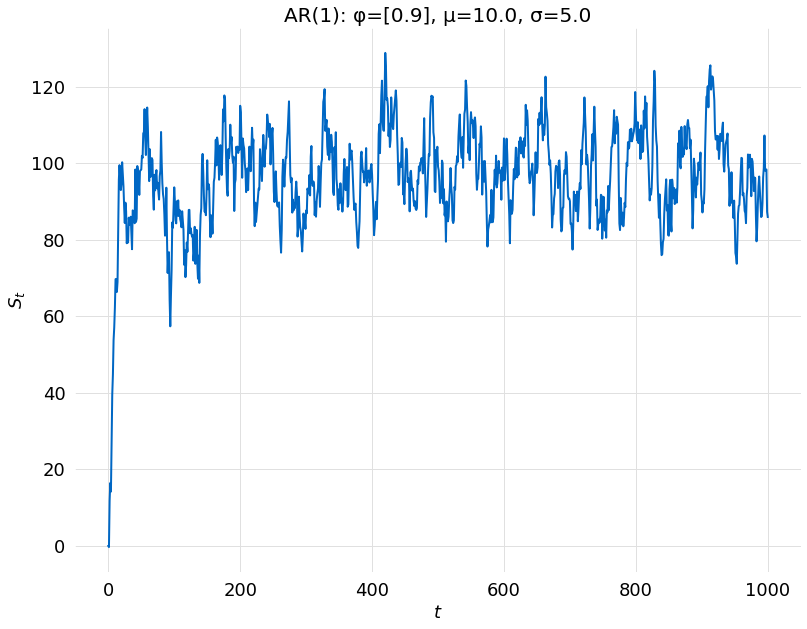

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [18]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3100.964
Date:                Tue, 17 May 2022   AIC                           6207.927
Time:                        19:56:39   BIC                           6222.654
Sample:                             0   HQIC                          6213.524
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.6867      2.504     37.812      0.000      89.779      99.595
ar.L1          0.9353      0.005    176.484      0.000       0.925       0.946
sigma2        28.6680      1.326     21.615      0.000      26.068      31.267
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.99
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.26
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [94.68674857930486, 2.504135578344501],
    'Parameters': [[0.9352693699904642, 0.005299458364974663]],
    'Sigma2': [28.667965553686127, 1.3263135046674406]}},
  'Tests': {}},
 'Date': '17/05/2022 19:56:39',
 'Name': 'AR(1)-Simulation-d26dfa8c-5f88-4bb9-8ba3-6695378d5562',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

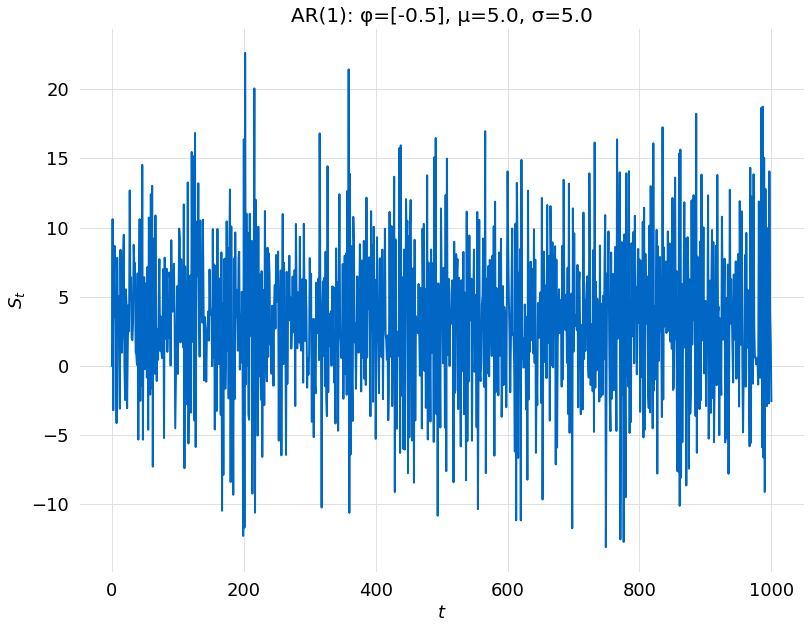

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [21]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3035.981
Date:                Tue, 17 May 2022   AIC                           6077.962
Time:                        19:56:39   BIC                           6092.688
Sample:                             0   HQIC                          6083.559
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2297      0.107     30.151      0.000       3.020       3.440
ar.L1         -0.4857      0.026    -18.398      0.000      -0.537      -0.434
sigma2        25.2231      1.102     22.886      0.000      23.063      27.383
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.78   Prob(JB):                         0.57
Heteroskedasticity (H):               1.17   Skew:                            -0.06
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [3.2297446937137204, 0.10711968815257322],
    'Parameters': [[-0.4857140932564579, 0.026400302634943484]],
    'Sigma2': [25.223117316260787, 1.102119617712509]}},
  'Tests': {}},
 'Date': '17/05/2022 19:56:39',
 'Name': 'AR(1)-Simulation-e7eb05e0-722a-407b-8011-3d6ee4de68a2',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}